IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

UPLOAD DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("forecasting_dataset.csv")

Saving forecasting_dataset.csv to forecasting_dataset.csv


DATA PREPARATION

In [ ]:
df = df.rename(columns={
    "Irradiance (kWh/m²)": "Irradiance",
    "Temperature (°C)": "Temperature",
    "Humidity (%)": "Humidity",
    "Solar Output (MWh)": "Solar Output"
})

df["Date"] = pd.to_datetime(df["Date"])

# Buat kolom Day Number (1, 2, 3, ...)
df["Day_Number"] = (df["Date"] - df["Date"].min()).dt.days + 1

print("Data berhasil dibaca!")
print(df.head())

Data berhasil dibaca!
        Date  Irradiance  Temperature   Humidity  Solar Output  Day_Number
0 2023-01-01    5.745071    27.169259  63.577874      0.983215           1
1 2023-01-02    4.792604    29.158709  65.607845      0.846485           2
2 2023-01-03    5.971533    29.314571  70.830512      1.343765           3
3 2023-01-04    7.284545    28.395445  70.538021      1.578983           4
4 2023-01-05    4.648770    29.677429  46.223306      0.925574           5


REGRESI LINEAR (IRRADIANCE VS SOLAR OUTPUT)


=== Regresi Linear Irradiance vs Solar Output ===
                            OLS Regression Results                            
Dep. Variable:           Solar Output   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.21e-24
Time:                        00:17:55   Log-Likelihood:                 33.341
No. Observations:                 100   AIC:                            -62.68
Df Residuals:                      98   BIC:                            -57.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

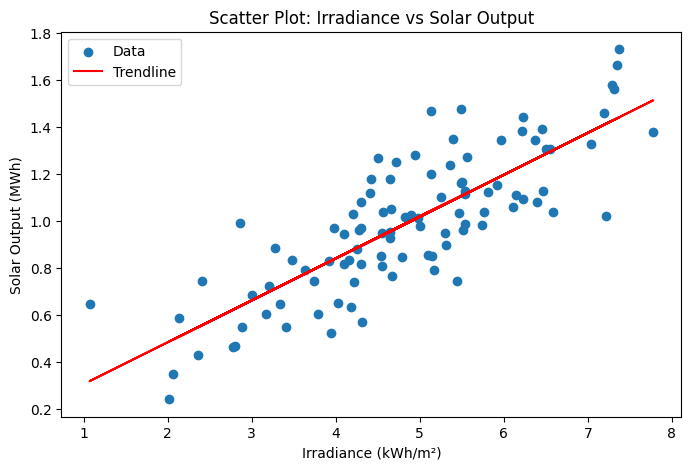

In [ ]:
X = sm.add_constant(df["Irradiance"])
model_irr = sm.OLS(df["Solar Output"], X).fit()

print("\n=== Regresi Linear Irradiance vs Solar Output ===")
print(model_irr.summary())

# Visualisasi scatter plot + trendline
plt.figure(figsize=(8,5))
plt.scatter(df["Irradiance"], df["Solar Output"], label="Data")
plt.plot(df["Irradiance"], model_irr.predict(X), color='red', label="Trendline")
plt.xlabel("Irradiance (kWh/m²)")
plt.ylabel("Solar Output (MWh)")
plt.title("Scatter Plot: Irradiance vs Solar Output")
plt.legend()
plt.show()

REGRESI LINER (DAY NUMBER VS SOLAR OUTPUT)


=== Regresi Linear Day Number vs Solar Output ===
                            OLS Regression Results                            
Dep. Variable:           Solar Output   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1222
Date:                Tue, 16 Sep 2025   Prob (F-statistic):              0.727
Time:                        00:18:02   Log-Likelihood:                -20.426
No. Observations:                 100   AIC:                             44.85
Df Residuals:                      98   BIC:                             50.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

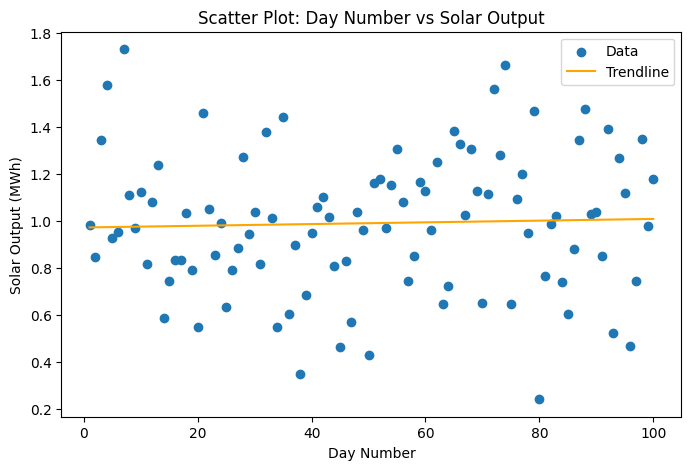

In [ ]:
X_day = sm.add_constant(df["Day_Number"])
model_day = sm.OLS(df["Solar Output"], X_day).fit()

print("\n=== Regresi Linear Day Number vs Solar Output ===")
print(model_day.summary())

plt.figure(figsize=(8,5))
plt.scatter(df["Day_Number"], df["Solar Output"], label="Data")
plt.plot(df["Day_Number"], model_day.predict(X_day), color='orange', label="Trendline")
plt.xlabel("Day Number")
plt.ylabel("Solar Output (MWh)")
plt.title("Scatter Plot: Day Number vs Solar Output")
plt.legend()
plt.show()

REGRESI MULTIVARIAT

In [ ]:
X_multi = sm.add_constant(df[["Irradiance", "Temperature", "Humidity"]])
model_multi = sm.OLS(df["Solar Output"], X_multi).fit()

print("\n=== Regresi Multivariat ===")
print(model_multi.summary())


=== Regresi Multivariat ===
                            OLS Regression Results                            
Dep. Variable:           Solar Output   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     62.17
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           2.03e-22
Time:                        13:56:40   Log-Likelihood:                 33.483
No. Observations:                 100   AIC:                            -58.97
Df Residuals:                      96   BIC:                            -48.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.218

EVALUASI MODEL

In [ ]:
df["Predicted"] = model_multi.predict(X_multi)

mae = mean_absolute_error(df["Solar Output"], df["Predicted"])
rmse = np.sqrt(mean_squared_error(df["Solar Output"], df["Predicted"]))
mape = np.mean(np.abs((df["Solar Output"] - df["Predicted"]) / df["Solar Output"])) * 100

print("\n=== Evaluasi Model ===")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")


=== Evaluasi Model ===
MAE  : 0.1421
RMSE : 0.1731
MAPE : 16.43%


## 1. Regresi Linear Irradiance vs Solar Output
- Persamaan regresi: **Y = a + bX**
- Nilai R² menunjukkan seberapa besar variasi Solar Output bisa dijelaskan oleh Irradiance.
- Jika R² mendekati 1 → hubungan sangat kuat.

## 2. Regresi Linear Day Number vs Solar Output
- R² lebih kecil dari regresi Irradiance → waktu (day number) kurang berpengaruh.

## 3. Regresi Multivariat
- Lihat koefisien (coef) → mana yang paling besar pengaruhnya.
- Perhatikan p-value:
  - p-value < 0.05 → signifikan secara statistik.
- Adjusted R² lebih tinggi → model multivariat lebih akurat dibandingkan model sederhana.

## 4. Evaluasi Model
- MAE (Mean Absolute Error) → rata-rata selisih absolut prediksi.
- RMSE (Root Mean Squared Error) → kesalahan kuadrat.
- MAPE (%) → persentase kesalahan.
- Nilai yang lebih kecil berarti model lebih akurat.